In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv('Student Mental health.csv')
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [57]:
df.shape

(101, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [59]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [63]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [ ]:
df = df.drop(['Date'], axis = 1)

In [56]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
df =df.dropna()

In [67]:
df_new_column_names = {'Timestamp': 'Date',
                       'Choose your gender': 'Gender',
                       'Age': 'Age',
                       'What is your course?': 'Major',
                       'Your current year of Study': 'Year of Study',
                       'What is your CGPA?': 'CGPA',
                       'Do you have Depression?': 'Depression',
                       'Do you have Anxiety?': 'Anxiety',
                       'Do you have Panic attack?': 'Panic Attacks',
                       'Did you seek any specialist for a treatment?': 'Treatment from a Specialist'}

df.rename(columns=df_new_column_names, inplace=True)

In [69]:
df['Age'] = df['Age'].astype(int)

In [70]:
df['CGPA'] = df['CGPA'].astype(str)

# Function to handle ranges by taking the average
def convert_gpa(value):
    if '-' in value:
        start, end = map(float, value.split(' - '))
        return round((start + end) / 2, 2)
    else:
        return round(float(value), 2)

# Apply the function to the 'GPA' column
df['CGPA'] = df['CGPA'].apply(convert_gpa).astype(float)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         100 non-null    object 
 1   Gender                       100 non-null    object 
 2   Age                          100 non-null    int32  
 3   Major                        100 non-null    object 
 4   Year of Study                100 non-null    object 
 5   CGPA                         100 non-null    float64
 6   Marital status               100 non-null    object 
 7   Depression                   100 non-null    object 
 8   Anxiety                      100 non-null    object 
 9   Panic Attacks                100 non-null    object 
 10  Treatment from a Specialist  100 non-null    object 
dtypes: float64(1), int32(1), object(9)
memory usage: 9.0+ KB


In [75]:
df.head(2)

,Date,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attacks,Treatment from a Specialist
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.25,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,year 2,3.25,No,No,Yes,No,No


In [76]:
df = df.drop(['Date'], axis = 1)

In [78]:
df['Major'] = df['Major'].replace({'Engineering': 'Engineering', 'Islamic education': 'Islamic education', 
                                   'BIT': 'Computer Science','Laws': 'Law', 'Pendidikan islam': 'Islamic Education',
                                   'BCS':'Computer Science', 'Irkhs': 'Others','Psychology': 'Medical', 'KENMS':'Others', 
                                   'Accounting ':'Finance','ENM':'Others', 'KOE':'Others', 'Banking Studies':'Finance',
                                   'Business Administration': 'Finance', 'KIRKHS': 'Others', 'Usuluddin ': 'Islamic Studies',
                                   'TAASL':'Others','Engine':'Engineering','ALA': 'Others','Biomedical science':'Medical', 
                                   'koe':'Others', 'Kirkhs':'Others', 'BENL':'Others','Benl':'Others', 
                                   'IT': 'Computer Science', 'CTS': 'Computer Science', 'Biotechnology':'Medical', 
                                   'engin':'Engineering','Econs':'Finance', 'MHSC':'Others', 'Malcom':'Others', 
                                   'Kop':'Others',  'Biotechnology':'Medical', 'Communication ':'Computer Science',
                                   'Diploma Nursing':'Medical', 'Pendidikan Islam ':'Islamic Education', 
                                   'Radiography':'Medical','psychology':'Medical', 'Fiqh fatwa ':'Islamic Education', 
                                   'DIPLOMA TESL': 'Others','Koe':'Others', 'Fiqh':'Islamic Education', 'Nursing ':'Medical',
                                   'Pendidikan Islam':'Others'})

In [79]:
df['Year of Study'].unique()
df['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [80]:
df.head()

,Gender,Age,Major,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic Attacks,Treatment from a Specialist
0,Female,18,Engineering,year 1,3.25,No,Yes,No,Yes,No
1,Male,21,Islamic education,year 2,3.25,No,No,Yes,No,No
2,Male,19,Computer Science,year 1,3.25,No,Yes,Yes,Yes,No
3,Female,22,Law,year 3,3.25,Yes,Yes,No,No,No
4,Male,23,Mathemathics,year 4,3.25,No,No,No,No,No


In [81]:
df.describe()

,Age,CGPA
count,100.00000,100.00000
mean,20.53000,3.38220
std,2.49628,0.53725
min,18.00000,0.99000
25%,18.00000,3.25000
50%,19.00000,3.25000
75%,23.00000,3.75000
max,24.00000,3.75000


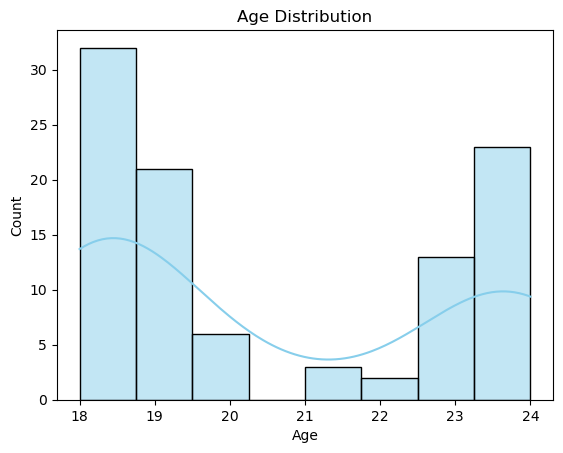

In [82]:
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

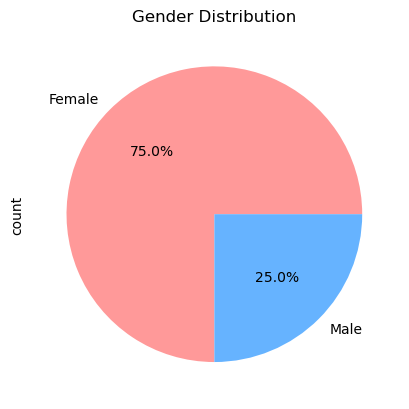

In [83]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.show()

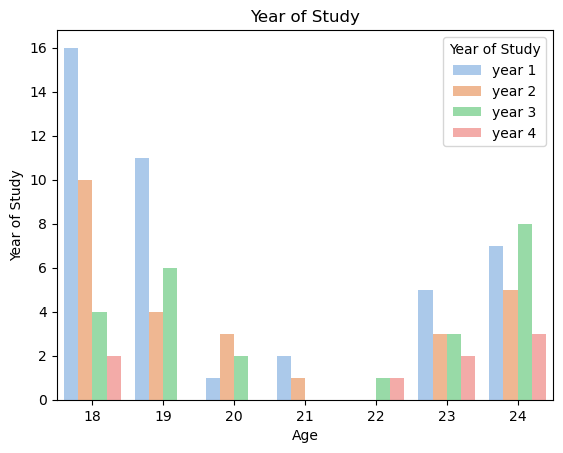

In [84]:
sns.countplot(x='Age', hue='Year of Study', data=df, palette='pastel')
plt.title('Year of Study')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.show()

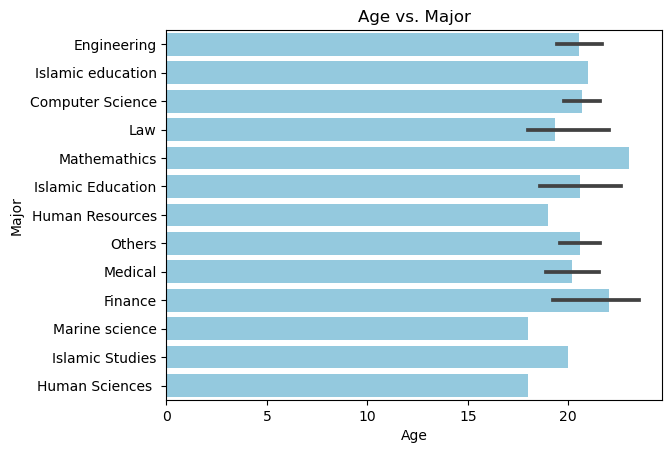

In [85]:
sns.barplot(x='Age', y='Major', data=df, color='skyblue')
plt.title('Age vs. Major')
plt.xlabel('Age')
plt.ylabel('Major')
plt.show()

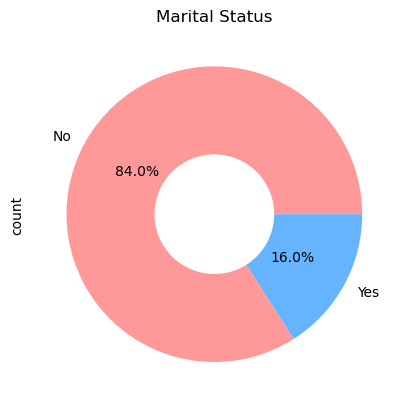

In [86]:
df['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Marital Status')
plt.show()

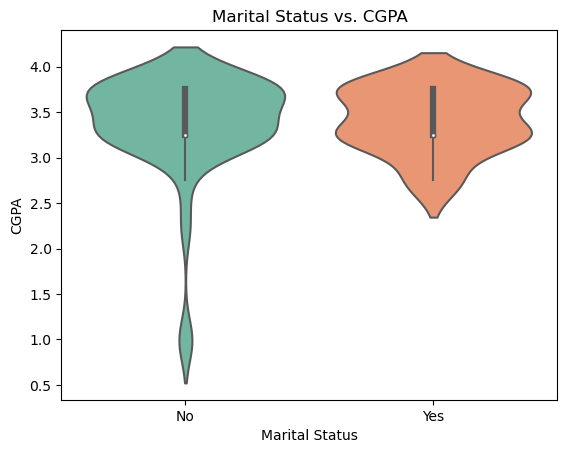

In [87]:
sns.violinplot(x='Marital status', y='CGPA', data=df, palette='Set2')
plt.title('Marital Status vs. CGPA')
plt.xlabel('Marital Status')
plt.ylabel('CGPA')
plt.show()

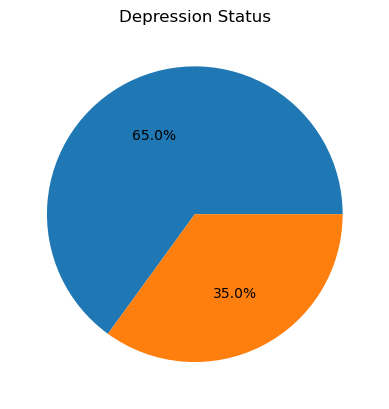

In [89]:
plt.pie(df['Depression'].value_counts(), autopct='%1.1f%%')
plt.title('Depression Status')
plt.show()

In [90]:
df_depression = df[df['Depression'] == 'Yes']

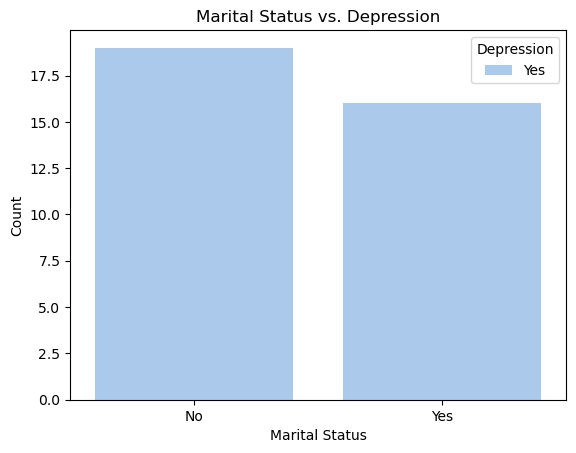

In [91]:
sns.countplot(x='Marital status', hue='Depression', data=df_depression, palette='pastel')
plt.title('Marital Status vs. Depression')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation between CGPA and Panic Attacks')

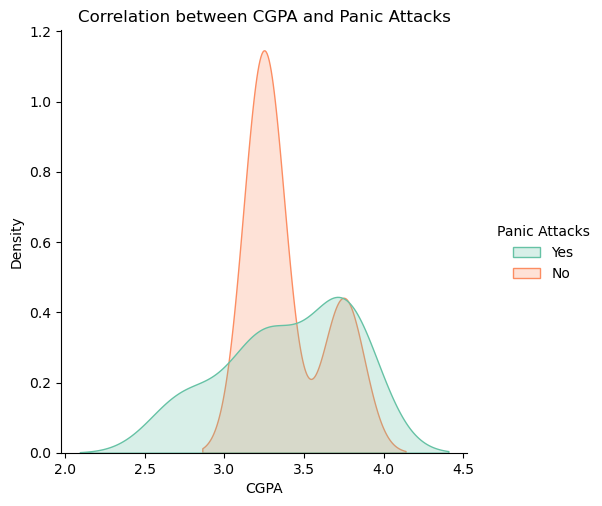

In [92]:
sns.displot(data=df_depression, x='CGPA', hue='Panic Attacks', palette='Set2', kind='kde', fill=True)
plt.title('Correlation between CGPA and Panic Attacks')

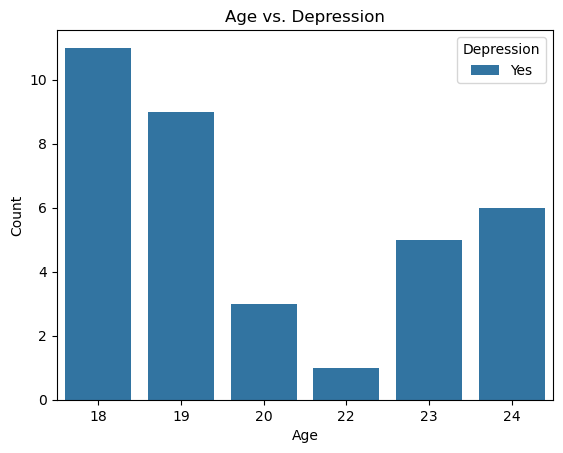

In [95]:
sns.countplot(x='Age', hue='Depression', data=df_depression)
plt.title('Age vs. Depression')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

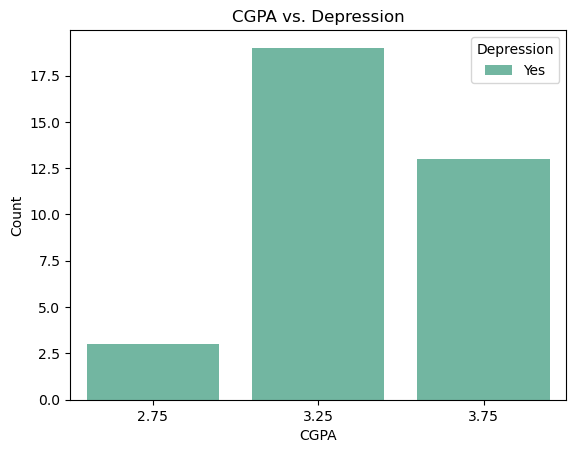

In [94]:
sns.countplot(x='CGPA', hue='Depression', data=df_depression, palette='Set2')
plt.title('CGPA vs. Depression')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

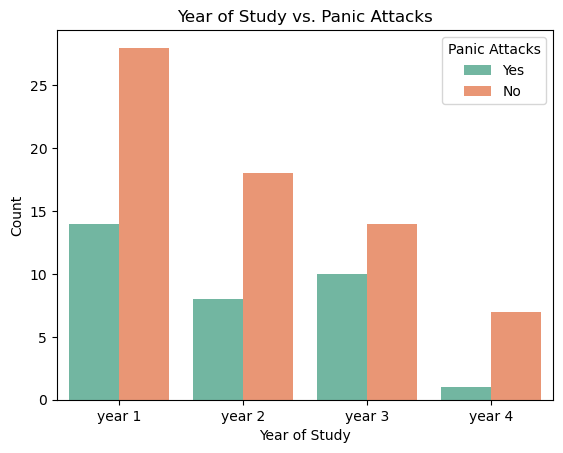

In [97]:
sns.countplot(x='Year of Study', hue='Panic Attacks', data=df, palette='Set2')
plt.title('Year of Study vs. Panic Attacks')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.show()

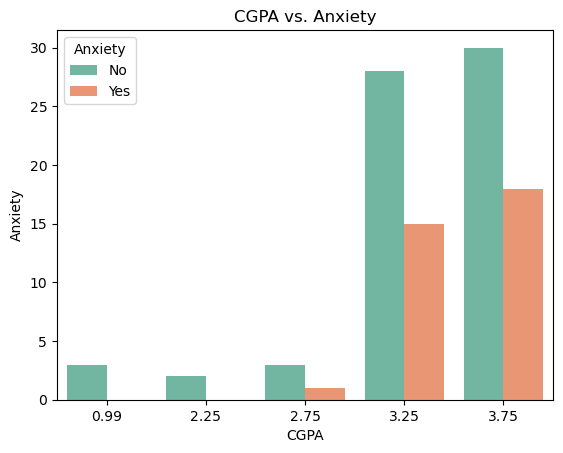

In [98]:
sns.countplot(x='CGPA', hue='Anxiety', data=df, palette='Set2')
plt.title('CGPA vs. Anxiety')
plt.xlabel('CGPA')
plt.ylabel('Anxiety')
plt.show()

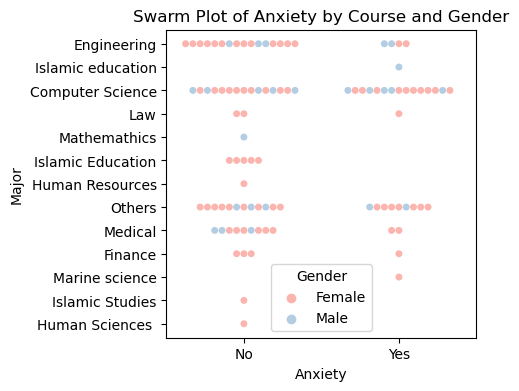

In [101]:
plt.figure(figsize=(4,4))
sns.swarmplot(data=df, x='Anxiety', y='Major', hue='Gender', palette='Pastel1')
plt.title('Swarm Plot of Anxiety by Course and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Major')
plt.show()

Text(0.5, 1.0, 'Medical Treatment from Specialist vs. Depression')

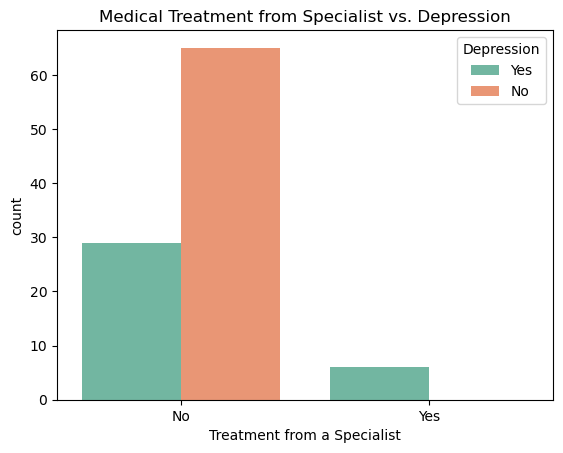

In [102]:
sns.countplot(data=df, x='Treatment from a Specialist', hue='Depression', palette='Set2', fill=True)
plt.title('Medical Treatment from Specialist vs. Depression')